In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(style="whitegrid")

In [9]:
ds = pd.read_csv("amazon.csv")
ds["rating"]=pd.to_numeric(ds["rating"],errors="coerce")
ds["rating_count"]=pd.to_numeric(ds["rating_count"],errors="coerce")
ds["rating"].fillna(ds["rating"].mean(),inplace=True)
ds["rating_count"].fillna(ds["rating_count"].mean(),inplace=True)
ds.drop_duplicates(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19848\1601137382.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  ds["rating"].fillna(ds["rating"].mean(),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19848\1601137382.py:5: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained ass

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19848\1380466428.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


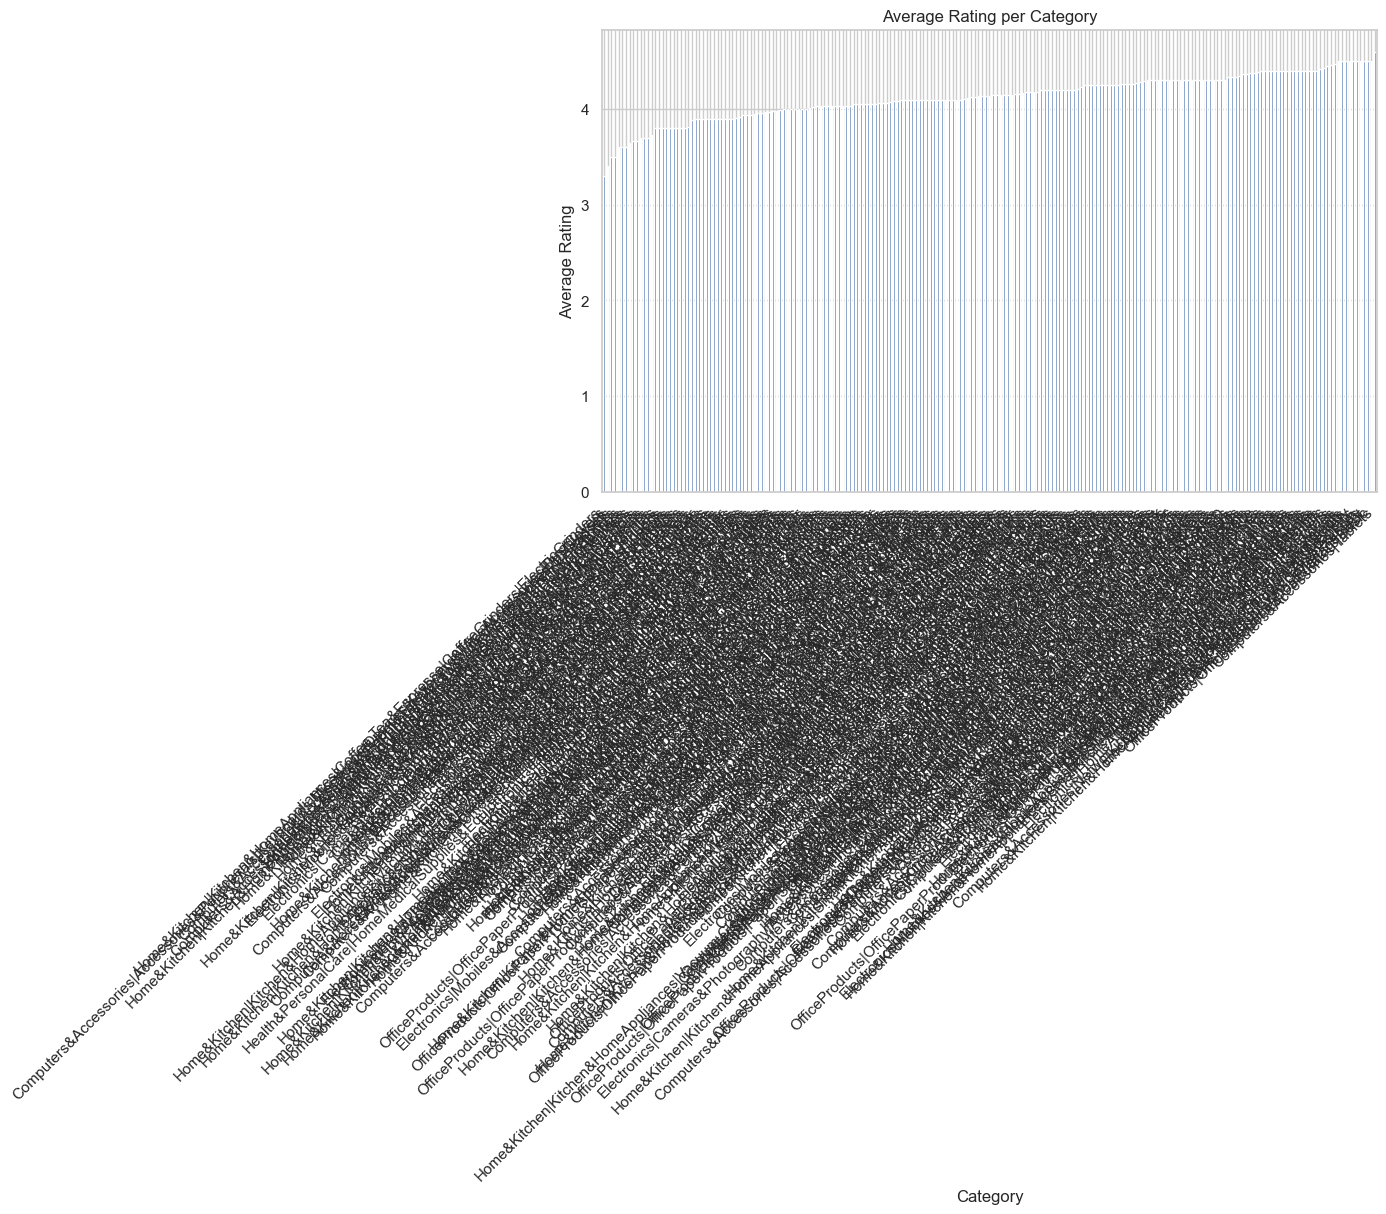

In [12]:
avg_rating = ds.groupby("category")["rating"].mean()

plt.figure(figsize=(10,6))
avg_rating.sort_values().plot(kind="bar")
plt.title("Average Rating per Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19848\865470081.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


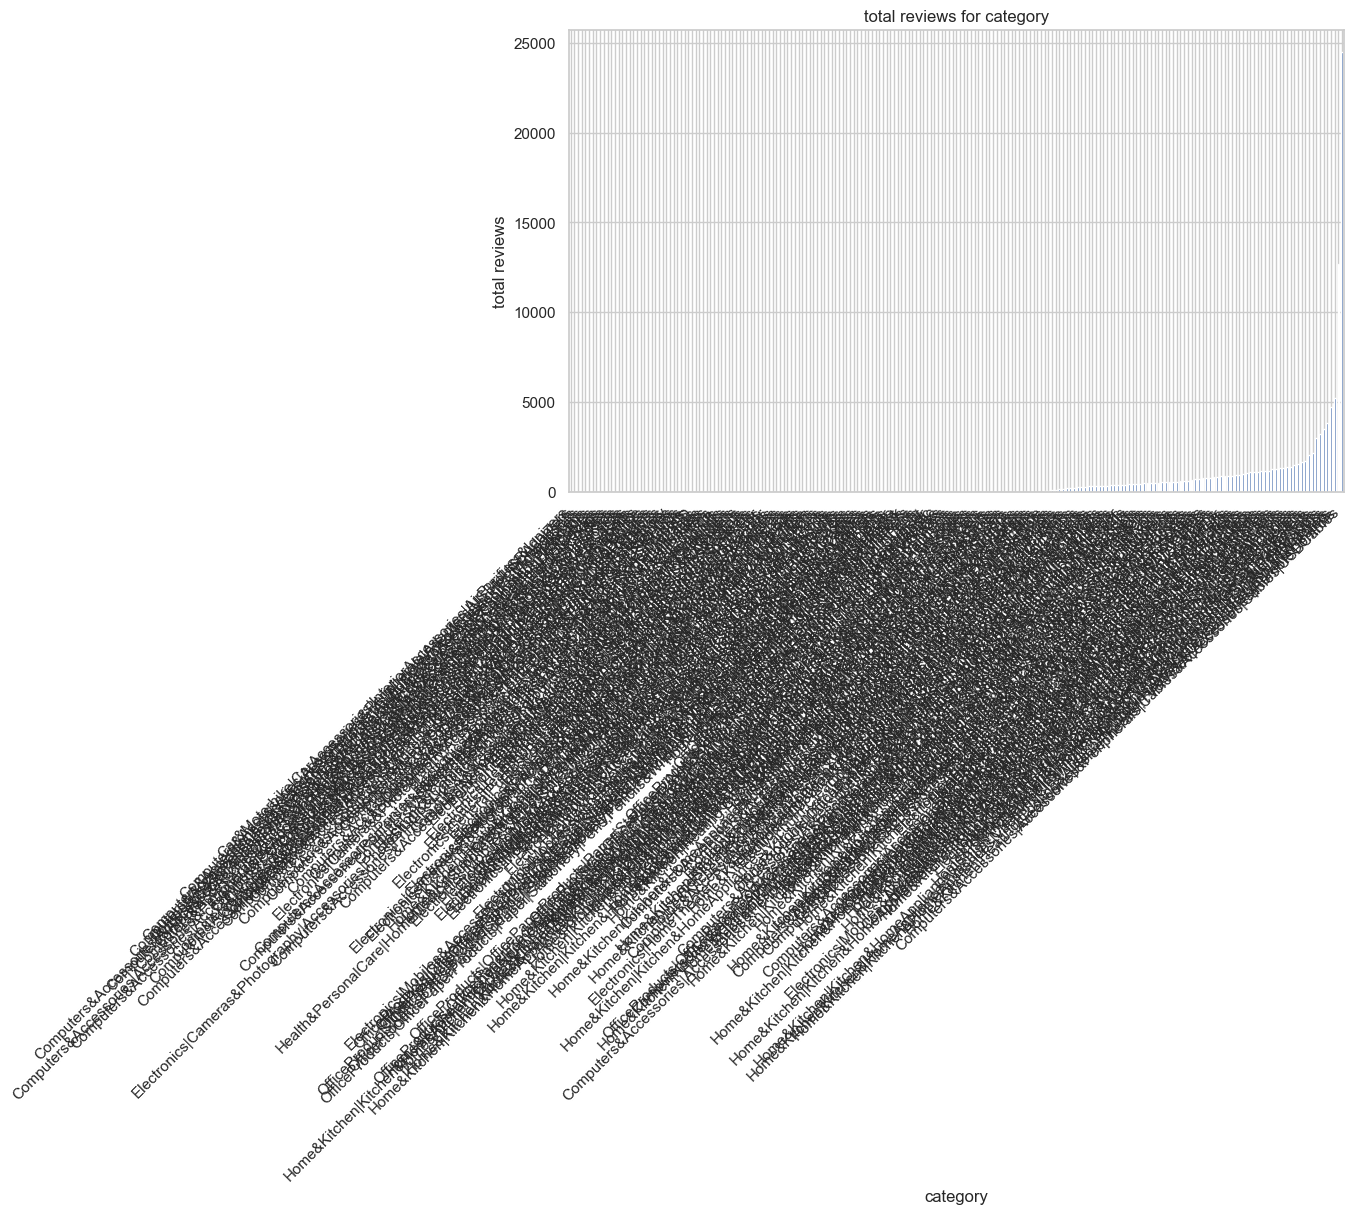

In [17]:
total_reviews=ds.groupby("category")["rating_count"].sum()

plt.figure(figsize=(10,6))
total_reviews.sort_values().plot(kind="bar")
plt.title("total reviews for category")
plt.xlabel("category")
plt.ylabel("total reviews")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

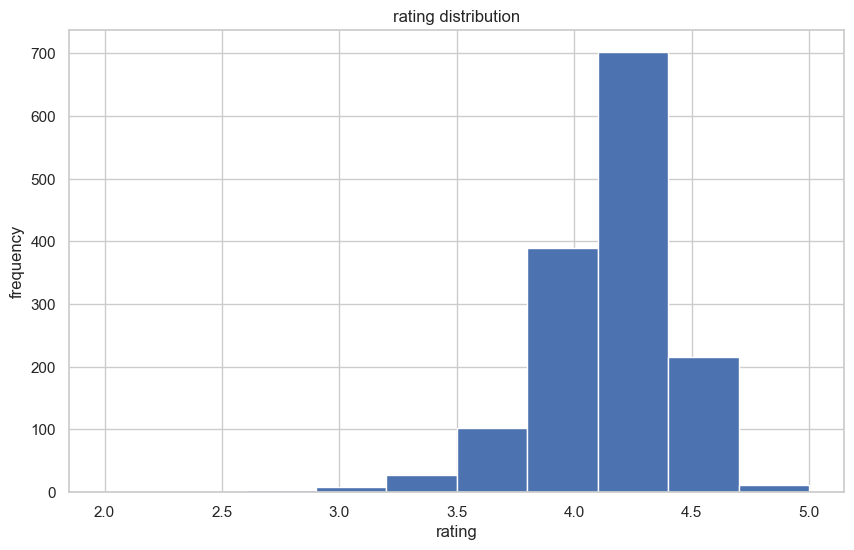

In [18]:
plt.figure(figsize=(10,6))
plt.hist(ds["rating"],bins=10)
plt.title("rating distribution")
plt.xlabel("rating")
plt.ylabel("frequency")
plt.show()

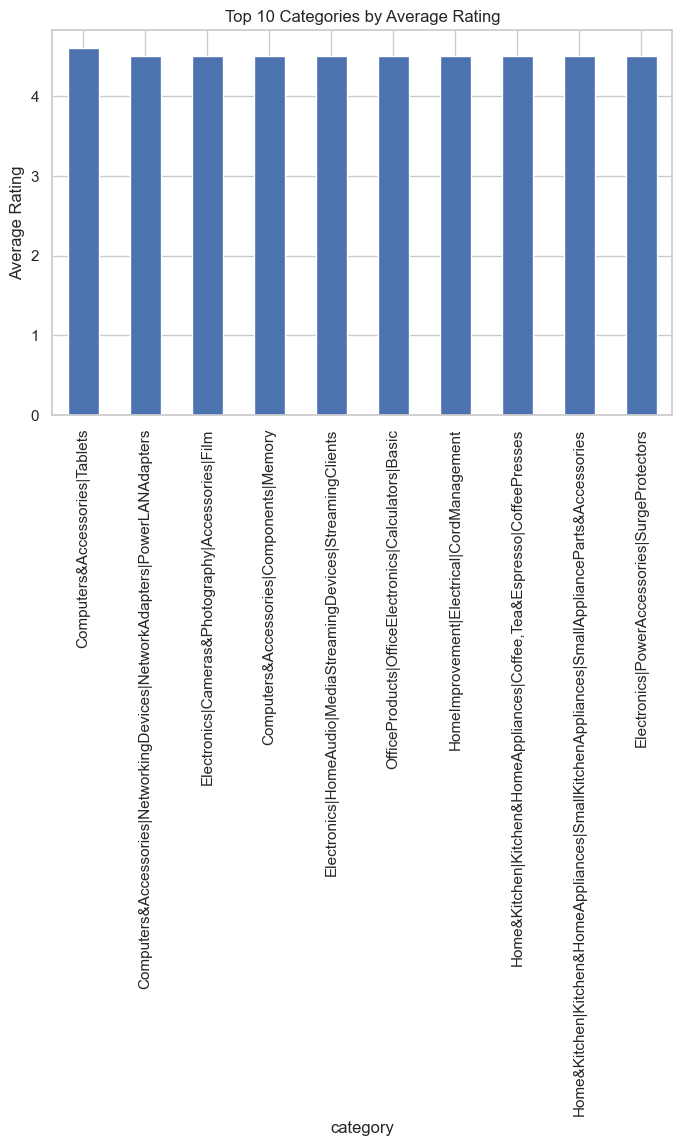

In [19]:
top10_avg = avg_rating.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top10_avg.plot(kind="bar")
plt.title("Top 10 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.show()

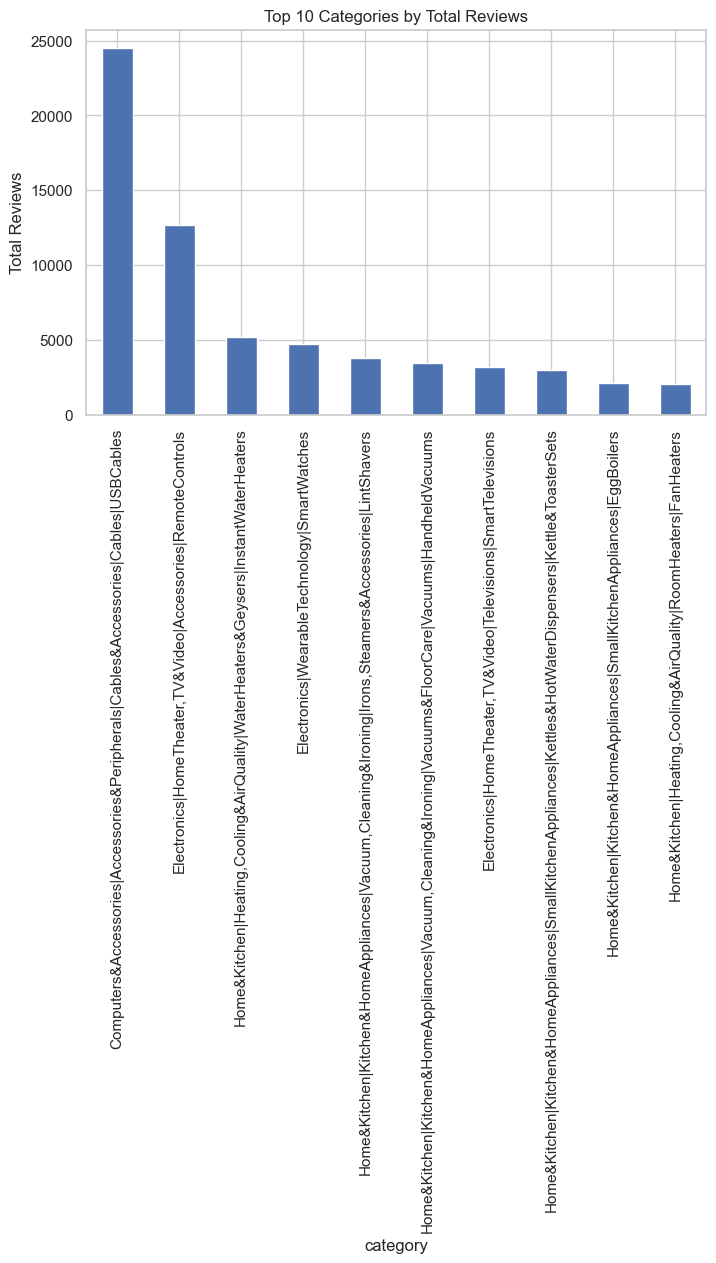

In [20]:
top10_reviews = total_reviews.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top10_reviews.plot(kind="bar")
plt.title("Top 10 Categories by Total Reviews")
plt.ylabel("Total Reviews")
plt.show()